# Análise descritiva para resposta contínua - parte 3
Considere a mesma base de dados utilizada na parte 1 ```previsao_de_renda.csv```.

## 1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [3]:
# Carregando bibliotecas 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Carregando DataFrame

df = pd.read_csv('previsao_de_renda.csv')
df.drop(columns=['Unnamed: 0', 'index'], inplace=True)

In [5]:
print(df.shape)
df.head(3)

(15000, 14)


,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98


In [6]:
# Informações do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   sexo                   15000 non-null  object 
 2   posse_de_veiculo       15000 non-null  bool   
 3   posse_de_imovel        15000 non-null  bool   
 4   qtd_filhos             15000 non-null  int64  
 5   tipo_renda             15000 non-null  object 
 6   educacao               15000 non-null  object 
 7   estado_civil           15000 non-null  object 
 8   tipo_residencia        15000 non-null  object 
 9   idade                  15000 non-null  int64  
 10  tempo_emprego          12466 non-null  float64
 11  qt_pessoas_residencia  15000 non-null  float64
 12  mau                    15000 non-null  bool   
 13  renda                  15000 non-null  float64
dtypes: bool(3), float64(3), int64(2), object(6)
memory usa

In [7]:
# Variáveis str

df_str = df.select_dtypes('object')
df_str.describe().transpose()

,count,unique,top,freq
data_ref,15000,15,2015-01-01,1000
sexo,15000,2,F,10167
tipo_renda,15000,5,Assalariado,7826
educacao,15000,5,Secundário,8927
estado_civil,15000,5,Casado,10550
tipo_residencia,15000,6,Casa,13566


In [8]:
# Variáveis qualitativas (bool)

df_bool = df.select_dtypes('bool')
df_bool.describe().transpose()

,count,unique,top,freq
posse_de_veiculo,15000,2,False,9167
posse_de_imovel,15000,2,True,10082
mau,15000,2,False,14638


Como pode-se notar, não há dados faltantes dentro das variáveis de interesse.

In [10]:
# Elaborand um dataframe

df_quali = pd.concat([df_bool, df_str], axis=1)

In [11]:
print(df_quali.shape)
df_quali.head()

(15000, 9)


,posse_de_veiculo,posse_de_imovel,mau,data_ref,sexo,tipo_renda,educacao,estado_civil,tipo_residencia
0,False,True,False,2015-01-01,F,Assalariado,Secundário,Casado,Casa
1,True,True,False,2015-01-01,M,Empresário,Secundário,Casado,Casa
2,True,True,False,2015-01-01,M,Assalariado,Superior completo,Casado,Casa
3,True,False,False,2015-01-01,F,Empresário,Secundário,Casado,Casa
4,False,False,False,2015-01-01,M,Assalariado,Secundário,Casado,Casa


In [12]:
df_quali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   posse_de_veiculo  15000 non-null  bool  
 1   posse_de_imovel   15000 non-null  bool  
 2   mau               15000 non-null  bool  
 3   data_ref          15000 non-null  object
 4   sexo              15000 non-null  object
 5   tipo_renda        15000 non-null  object
 6   educacao          15000 non-null  object
 7   estado_civil      15000 non-null  object
 8   tipo_residencia   15000 non-null  object
dtypes: bool(3), object(6)
memory usage: 747.2+ KB


In [13]:
# Quantidade de meses que compõem o dataframe

df_quali['data_ref'].nunique()

15

**Gerando gráficos de barras:**

In [15]:
# Convertendo as datas para "datetime64[ns]"

df_quali['data_ref'] = pd.to_datetime(df_quali['data_ref'])
df_quali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   posse_de_veiculo  15000 non-null  bool          
 1   posse_de_imovel   15000 non-null  bool          
 2   mau               15000 non-null  bool          
 3   data_ref          15000 non-null  datetime64[ns]
 4   sexo              15000 non-null  object        
 5   tipo_renda        15000 non-null  object        
 6   educacao          15000 non-null  object        
 7   estado_civil      15000 non-null  object        
 8   tipo_residencia   15000 non-null  object        
dtypes: bool(3), datetime64[ns](1), object(5)
memory usage: 747.2+ KB


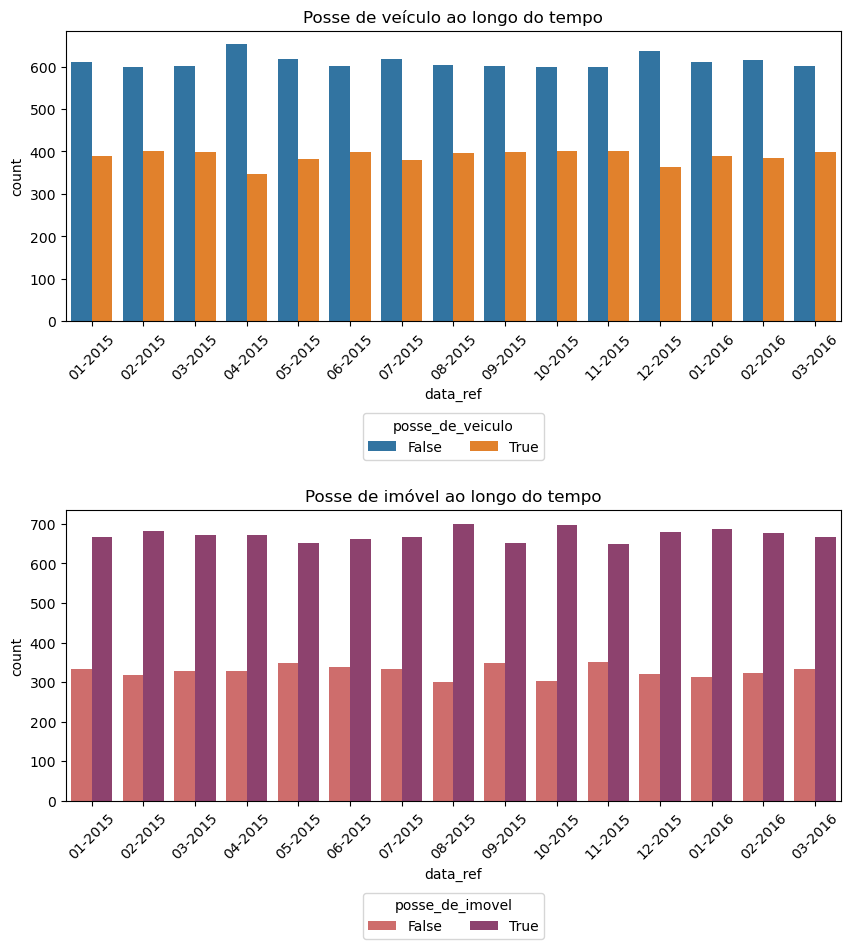

In [16]:
# Definindo a figura e suas dimensões
fig, axes = plt.subplots(2,1, figsize=[10,10])

# Figura da posse_de_veiculo em relação ao tempo
# Gerando o gráfico
ax1 = sns.countplot(ax=axes[0], x='data_ref', hue='posse_de_veiculo', data=df_quali)
# Configurando para melhor exibição do painel
tick_labels = df_quali['data_ref'].map(lambda dr: dr.strftime('%m-%Y')).unique()
# The strftime() method returns a string representing date and time using date, time or datetime object.
ticks = ax1.set_xticks(list(range(df_quali['data_ref'].nunique())))
labels = ax1.set_xticklabels(tick_labels, rotation=45)                                  
# Modificando a legenda
ax1.legend(loc='lower center', bbox_to_anchor=[.5, -.5], ncol=2, title='posse_de_veiculo')
ax1.set_title('Posse de veículo ao longo do tempo') # Título

# Figura da posse_de_imovel ao longo do tempo
ax2 = sns.countplot(ax=axes[1], x='data_ref', hue='posse_de_imovel', data=df_quali, palette='flare')
ticks = ax2.set_xticks(list(range(df_quali['data_ref'].nunique())))
labels = ax2.set_xticklabels(df_quali['data_ref'].map(lambda dr: dr.strftime('%m-%Y')).unique(), rotation=45)
ax2.legend(loc='lower center', bbox_to_anchor=[.5, -.5], ncol=2, title='posse_de_imovel')
ax2.set_title('Posse de imóvel ao longo do tempo')

# Ajuste entre os painéis
plt.subplots_adjust(wspace=.5, hspace=.65)

In [17]:
# Cores painéis
# sns.countplot(x='data_ref', hue='posse_de_veiculo', data=df_quali, palette='Spectral')
# sns.countplot(x='data_ref', hue='posse_de_veiculo', data=df_quali, palette='Set2')
# sns.countplot(x='data_ref', hue='posse_de_veiculo', data=df_quali, palette='pastel')

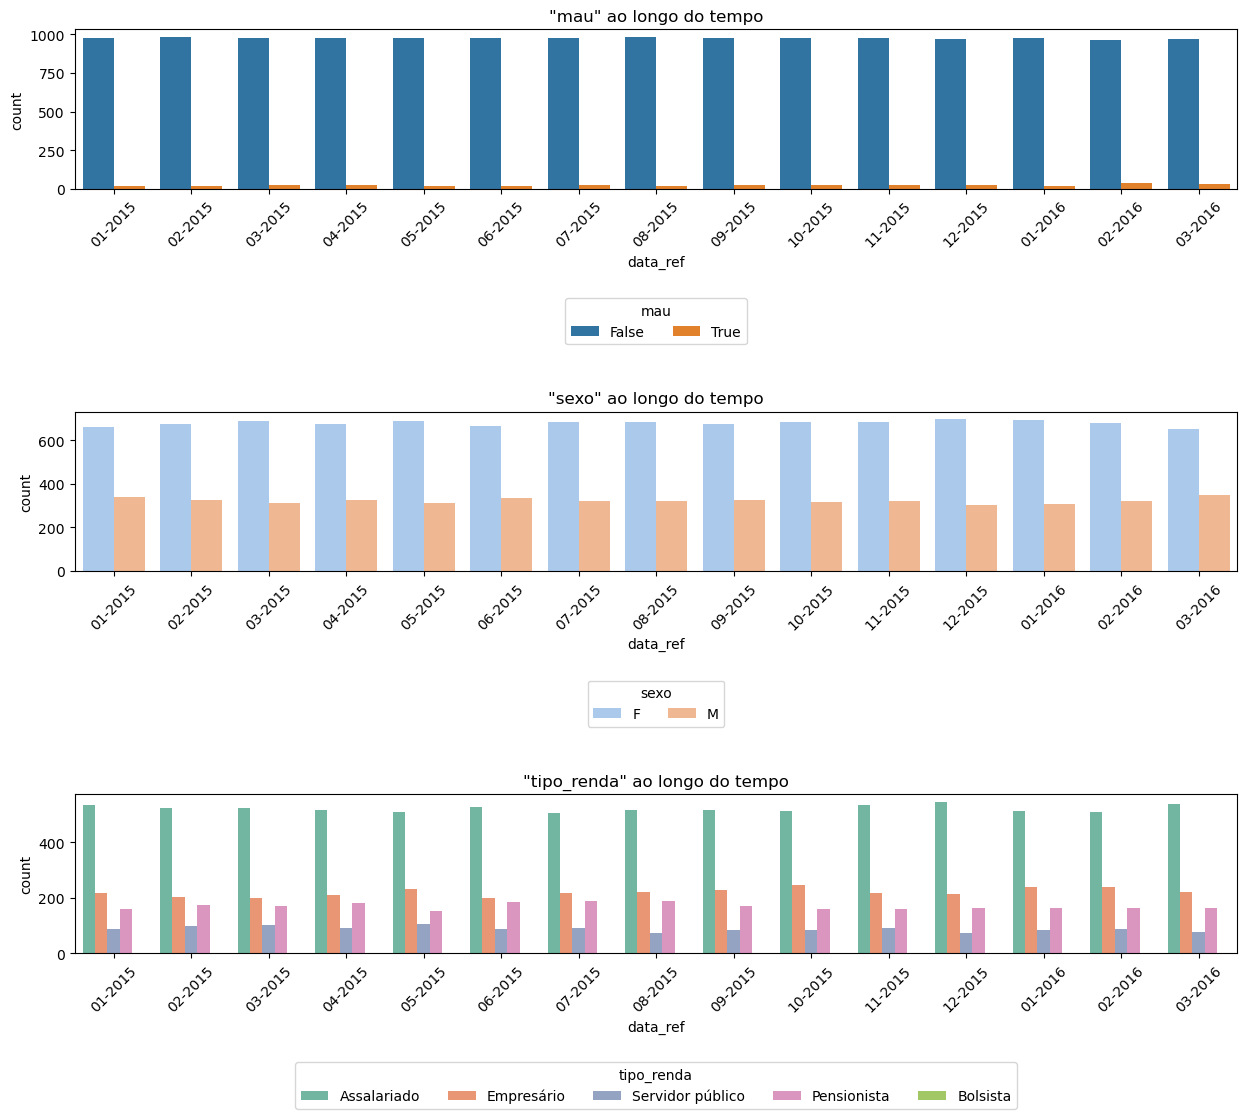

In [251]:
# Painéis para as variáveis: 'mau', 'sexo' e 'tipo_renda'

# Figura
fig, axes = plt.subplots(3, 1)
plt.rc('figure', figsize=[10,10])

# Tick labels dos painéis
tick_labels = df_quali['data_ref'].map(lambda dr: dr.strftime('%m-%Y')).unique()
bbox_config = [.5, -1.02]

# Painel 1
ax1 = sns.countplot(ax=axes[0], x='data_ref', hue='mau', data=df_quali)
ax1.set_xticks(list(range(df_quali['data_ref'].nunique())))
ax1.set_xticklabels(tick_labels, rotation=45)
ax1.legend(loc='lower center', bbox_to_anchor=bbox_config, ncol=2, title='mau')
ax1.set_title('"mau" ao longo do tempo')

# Painel 2
ax2 = sns.countplot(ax=axes[1], x='data_ref', hue='sexo', data=df_quali, palette='pastel')
ax2.set_xticks(list(range(df_quali['data_ref'].nunique())))
ax2.set_xticklabels(tick_labels, rotation=45) 
ax2.legend(loc='lower center', bbox_to_anchor=bbox_config, ncol=2, title='sexo')
ax2.set_title('"sexo" ao longo do tempo')

# Painel 3
ax3 = sns.countplot(ax=axes[2], x='data_ref', hue='tipo_renda', data=df_quali, palette='Set2')
ax3.set_xticks(list(range(df_quali['data_ref'].nunique())))
ax3.set_xticklabels(tick_labels, rotation=45)
ax3.legend(loc='lower center', bbox_to_anchor=bbox_config, ncol=5, title='tipo_renda')
ax3.set_title('"tipo_renda" ao longo do tempo')

plt.subplots_adjust(wspace=.5, hspace=1.4)

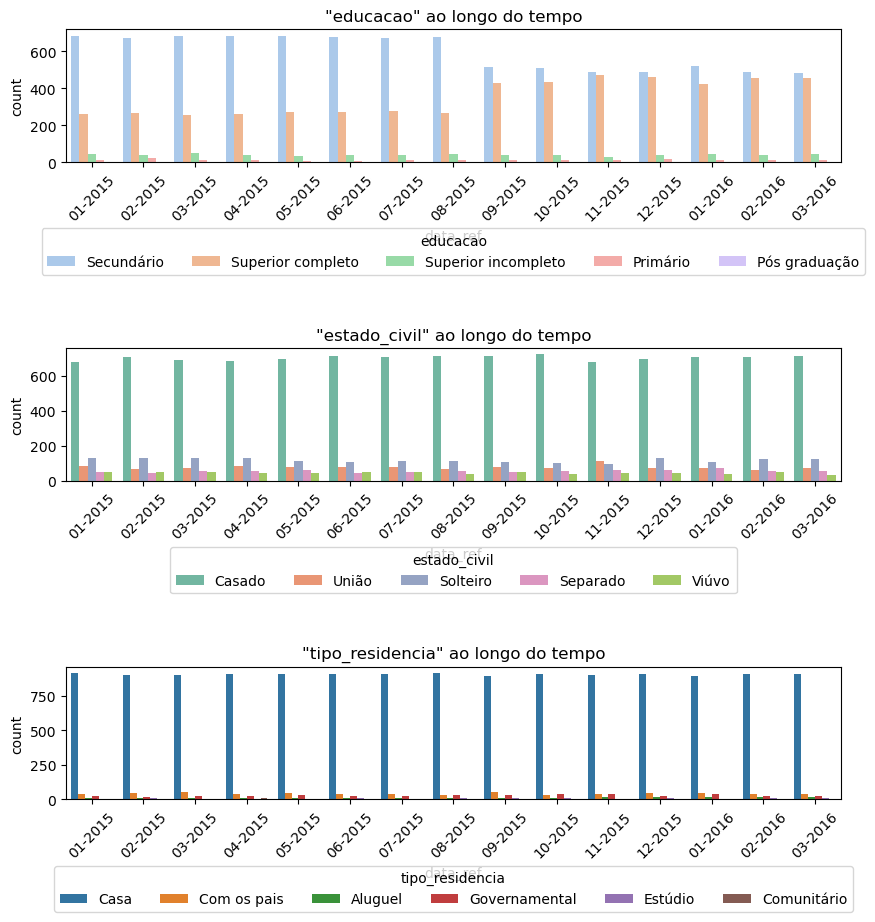

In [20]:
# Painéis para as variáveis 'educacao', estado_civil' e 'tipo_residencia'

# Figura
fig, axes = plt.subplots(3, 1)
plt.rc('figure', figsize=[15,12])

# Tick labels dos painéis
tick_labels = df_quali['data_ref'].map(lambda dr: dr.strftime('%m-%Y')).unique()
bbox_config = [.5, -.9]

# Painel 4
ax4 = sns.countplot(ax=axes[0], x='data_ref', hue='educacao', data=df_quali, palette='pastel')
ax4.set_xticks(list(range(df_quali['data_ref'].nunique())))
ax4.set_xticklabels(tick_labels, rotation=45)
ax4.legend(loc='lower center', bbox_to_anchor=bbox_config, ncol=5, title='educacao')
ax4.set_title('"educacao" ao longo do tempo')

# Painel 5
ax5 = sns.countplot(ax=axes[1], x='data_ref', hue='estado_civil', data=df_quali, palette='Set2')
ax5.set_xticks(list(range(df_quali['data_ref'].nunique())))
ax5.set_xticklabels(tick_labels, rotation=45)
ax5.legend(loc='lower center', bbox_to_anchor=bbox_config, ncol=5, title='estado_civil')
ax5.set_title('"estado_civil" ao longo do tempo')

# Painel 6
ax6 = sns.countplot(ax=axes[2], x='data_ref', hue='tipo_residencia', data=df_quali)
ax6.set_xticks(list(range(df_quali['data_ref'].nunique())))
ax6.set_xticklabels(tick_labels, rotation=45)
ax6.legend(loc='lower center', bbox_to_anchor=bbox_config, ncol=6, title='tipo_residencia')
ax6.set_title('"tipo_residencia" ao longo do tempo')

plt.subplots_adjust(wspace=.5, hspace=1.4)

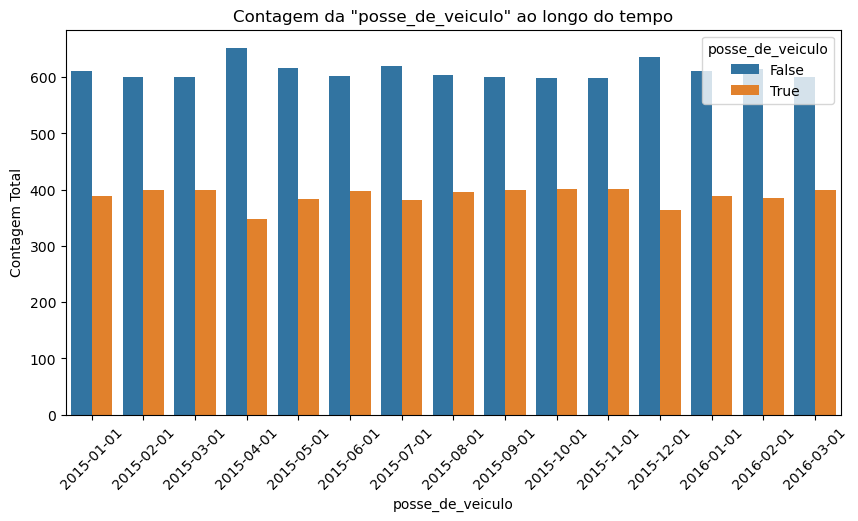

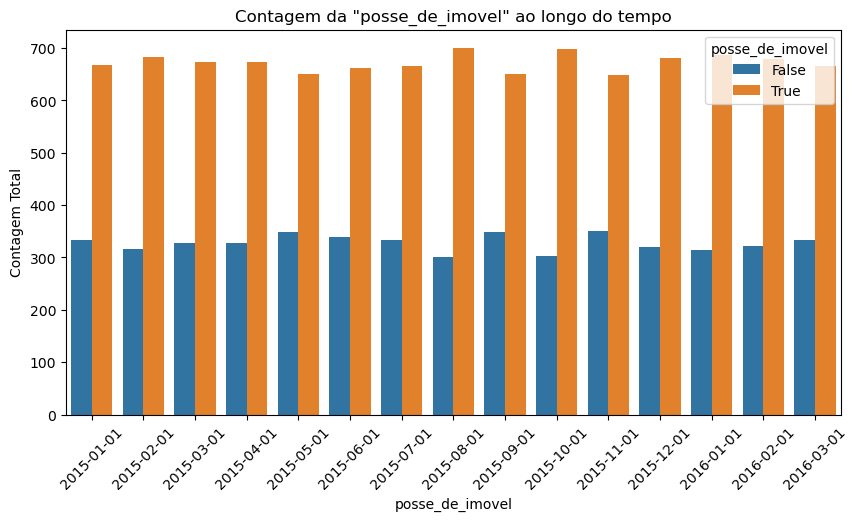

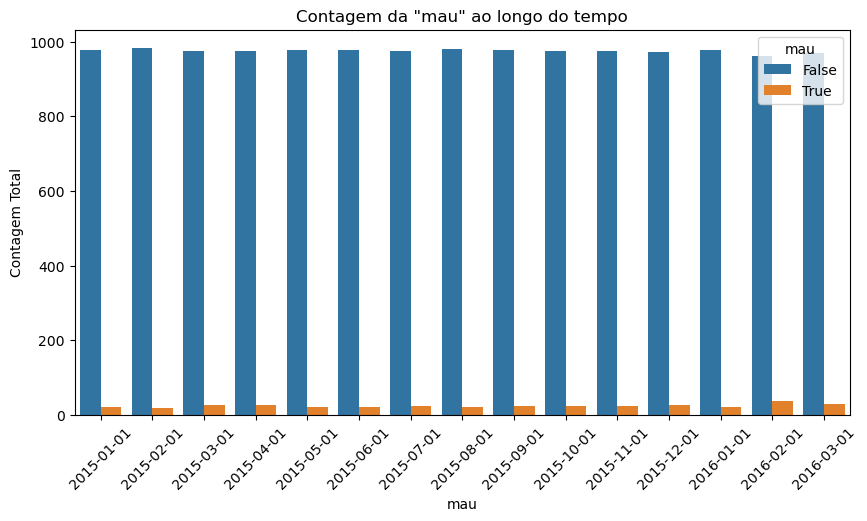

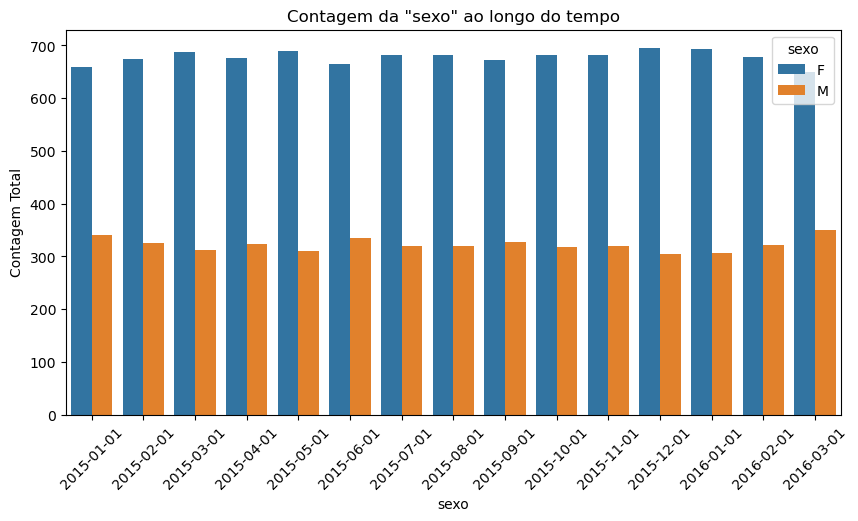

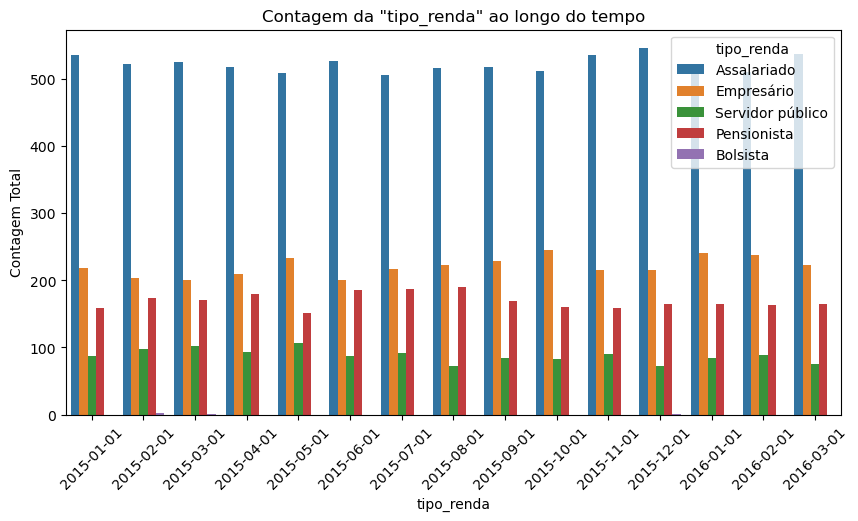

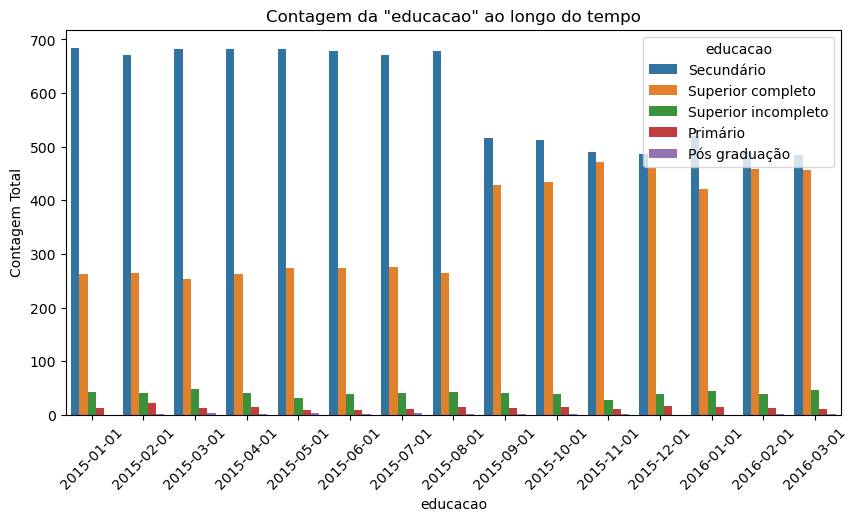

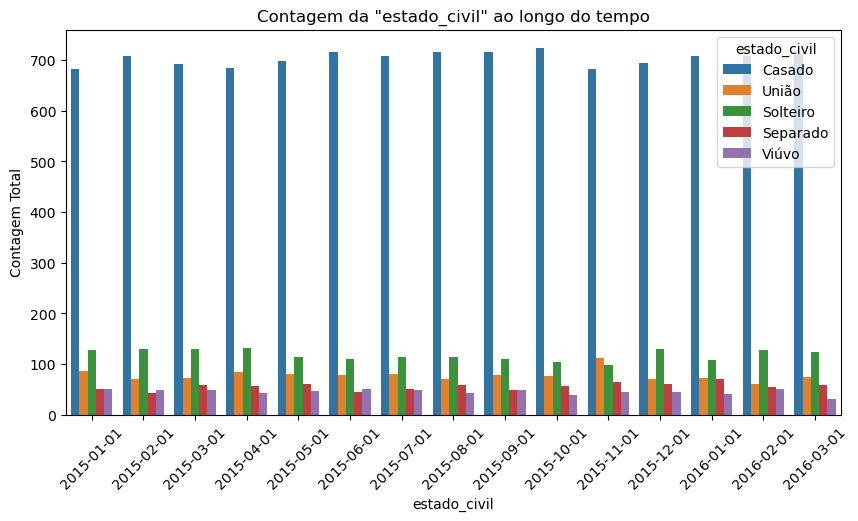

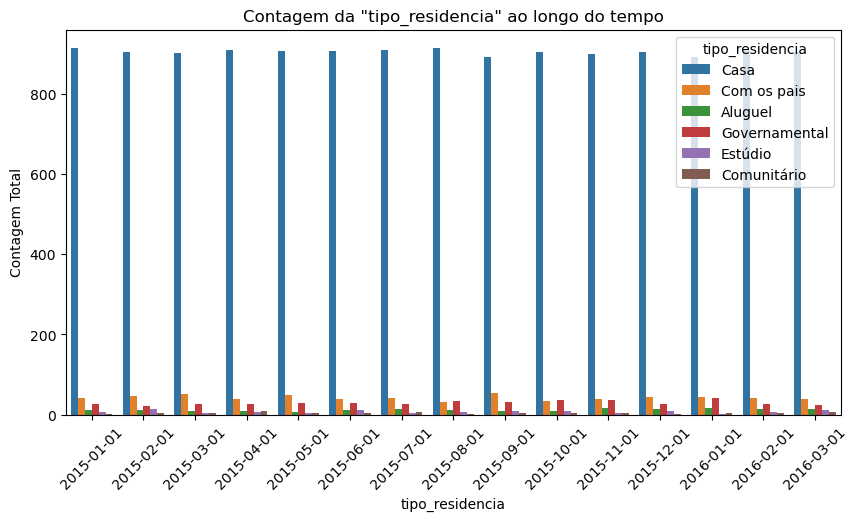

In [86]:
# Uma forma mais direta de gerar tais gráficos seria fazendo:

quali = ['posse_de_veiculo', 'posse_de_imovel', 'mau', 'sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

for qualitativa in quali:
    plt.figure(figsize=[10,5])
    plt.title(f'Contagem da "{qualitativa}" ao longo do tempo')
    sns.countplot(x='data_ref', hue=qualitativa, data=df_quali)
    plt.ylabel('Contagem Total')
    plt.xlabel(qualitativa)
    plt.xticks(rotation=45)
    # plt.legend(loc='best')

Como pode-se notar, o único gráfico que demonstra uma alteração significativa ao longo do tempo está associado à escolaridade dos indivíduos. 

Exibindo tal gráfico isoladamente



Text(0.5, 1.0, 'Educação ao longo do tempo')

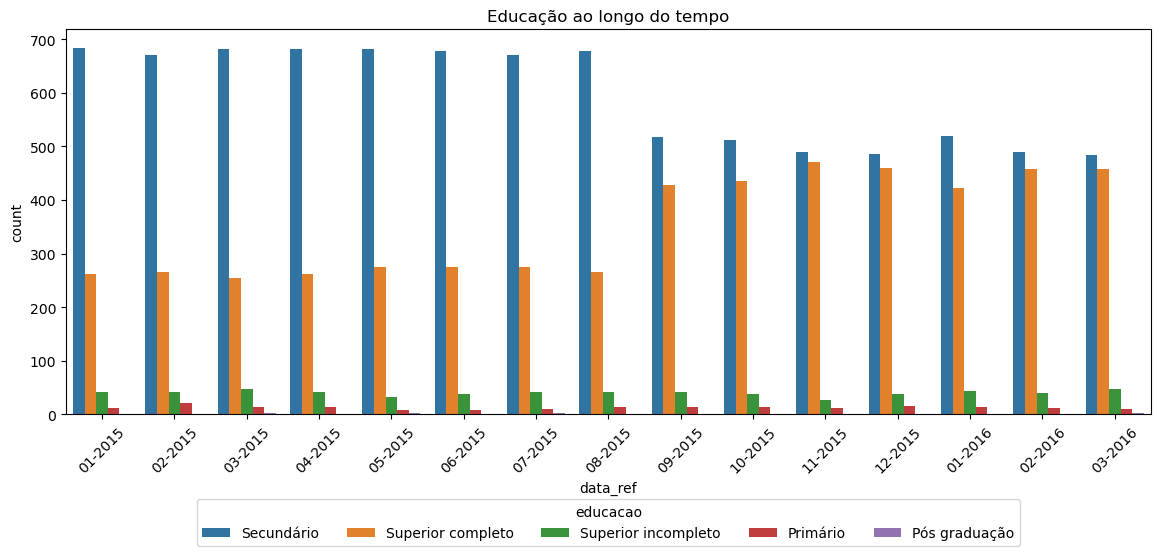

In [22]:
# Gráfico da "educação" ao longo do tempo

fig = plt.figure(figsize=[14,5])
ax = sns.countplot(x='data_ref', hue='educacao', data=df_quali)
tick_labels = df_quali['data_ref'].map(lambda dr: dr.strftime('%m-%Y')).unique()
ax.set_xticks(list(range(df['data_ref'].nunique())))
ax.set_xticklabels(tick_labels, rotation=45)

plt.legend(loc='lower center', bbox_to_anchor=[.5, -.36], ncol=5, title='educacao')
plt.title('Educação ao longo do tempo')

## Insights

Pode-se afirmar que a partir de 08/2015 o número de indivíduos com ensino superior aumentou significativamente, de modo que chegou próximo aos números referentes a indivíduos com 'educacao' = *secundário*.

## 2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [194]:
df_quali.columns

Index(['posse_de_veiculo', 'posse_de_imovel', 'mau', 'data_ref', 'sexo',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'],
      dtype='object')

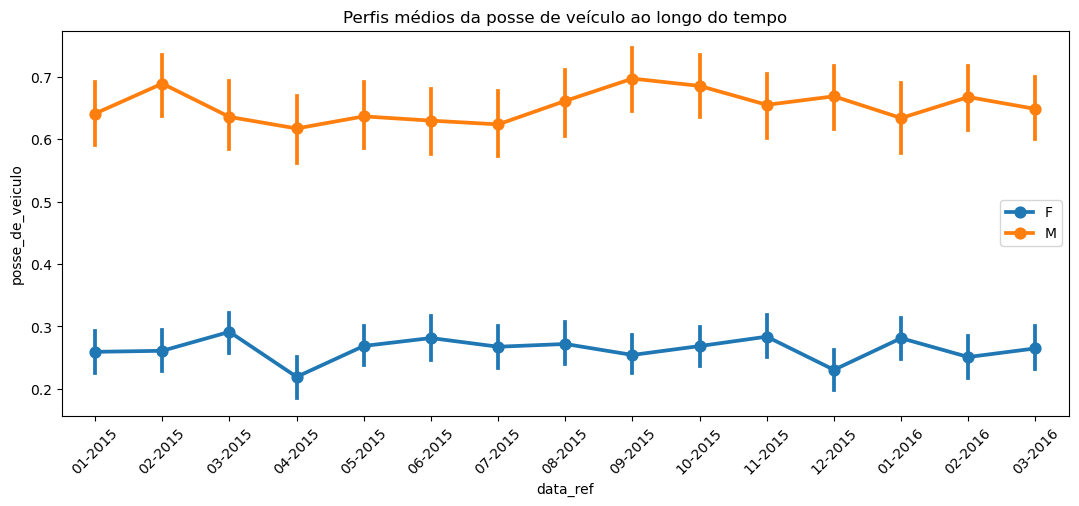

In [188]:
# Para a variável "posse_de_veiculo"

plt.figure(figsize=[13,5])
ax =sns.pointplot(
    data=df_quali,
    x='data_ref',
    y='posse_de_veiculo',
    hue='sexo'
)

tick_labels = df_quali['data_ref'].map(lambda dr: dr.strftime('%m-%Y')).unique()
ax.set_xticks(list(range(df['data_ref'].nunique())))
ax.set_xticklabels(tick_labels, rotation=45)
ax.set_title('Perfis médios da posse de veículo ao longo do tempo')
plt.legend(loc='best')

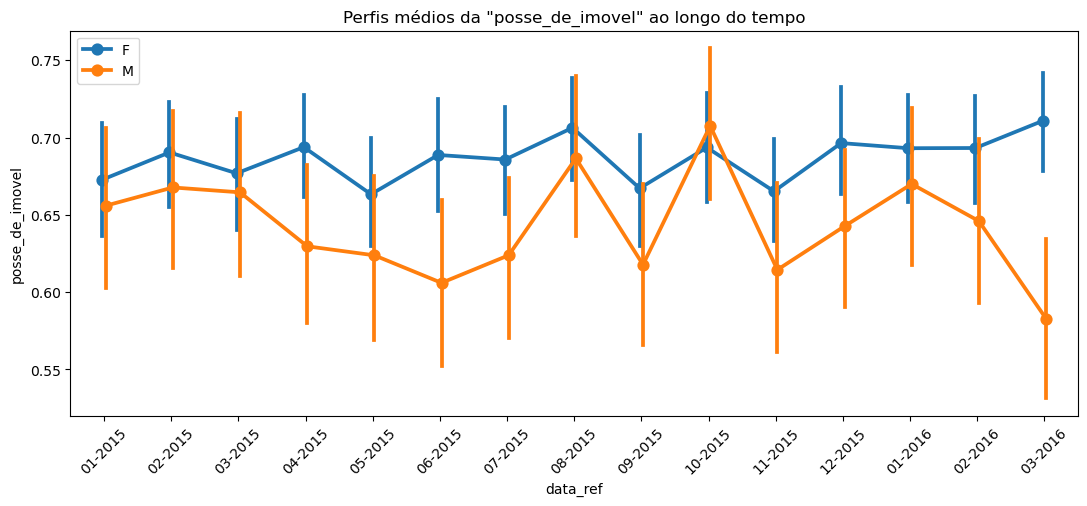

In [207]:
# Para a variável 'posse_de_imovel'

fig = plt.figure(figsize=[13, 5])
ax = sns.pointplot(data=df_quali,
              x='data_ref',
              y='posse_de_imovel', 
              hue='sexo', 
              dodge=True
)

ax.set_xticks(list(range(df_quali['data_ref'].nunique())))
ax.set_xticklabels(df_quali['data_ref'].map(lambda dr: dr.strftime('%m-%Y')).unique(), rotation=45)
ax.set_title('Perfis médios da "posse_de_imovel" ao longo do tempo')
plt.legend(loc='best')

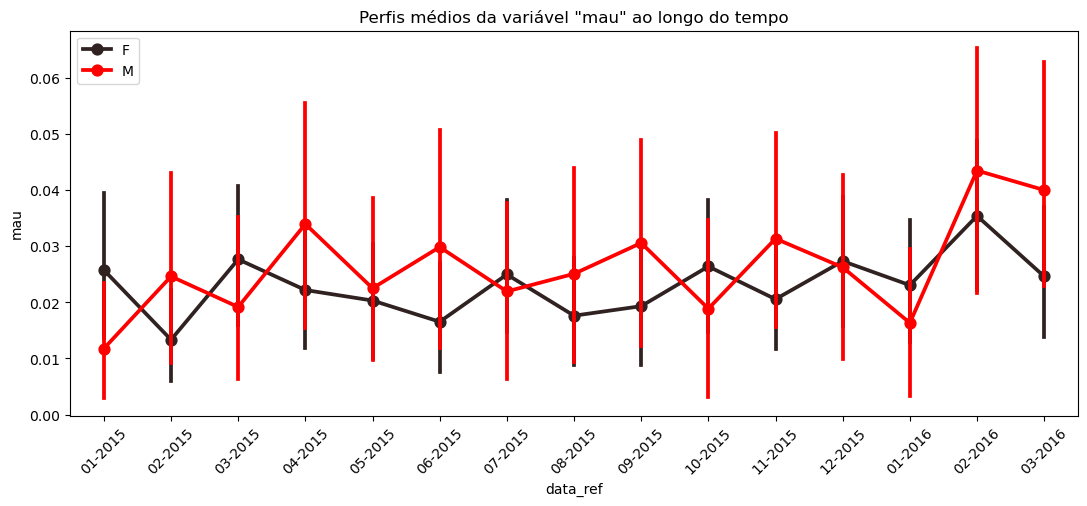

In [253]:
# Para a variável 'mau'

fig = plt.figure(figsize=[13,5])
ax = sns.pointplot(
    data=df_quali,
    x='data_ref', 
    y='mau',
    hue='sexo',
    palette='dark:red'

)

ax.set_xticks(list(range(df_quali['data_ref'].nunique())))
ax.set_xticklabels(df_quali['data_ref'].map(lambda dr: dr.strftime('%m-%Y')).unique(), rotation=45)
plt.title('Perfis médios da variável "mau" ao longo do tempo')
plt.legend(loc='best')

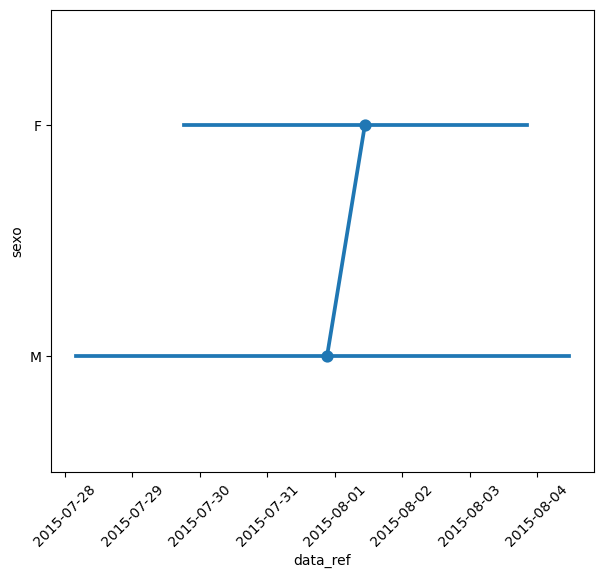

In [241]:
# Em função da variável 'sexo'

fig = plt.figure(figsize=[7,6])

ax = sns.pointplot(
        data=df_quali,
        x='data_ref',
        y='sexo',
        dodge=True    
)

ax.tick_params(axis='x', rotation=45)

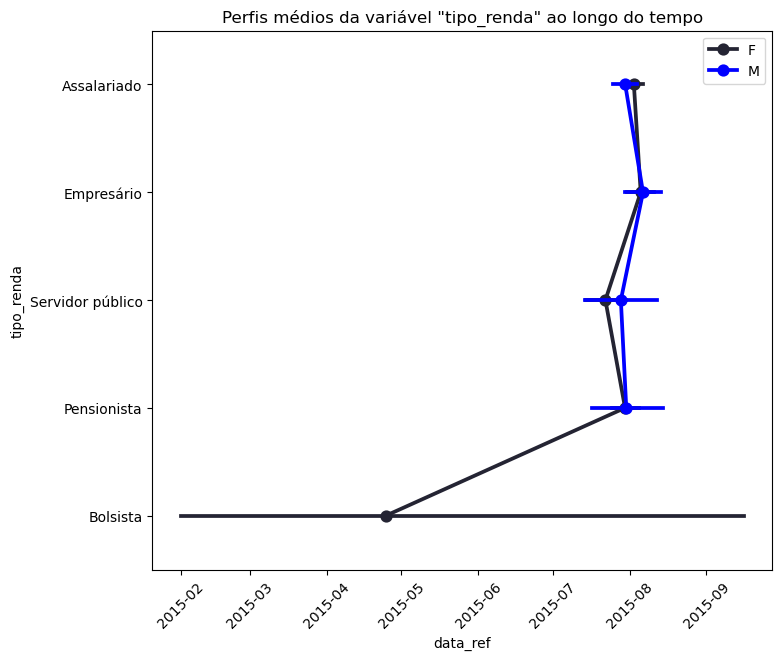

In [317]:
# Para 'tipo_renda'

fig = plt.figure(figsize=[8,7])
ax = sns.pointplot(data=df_quali, 
                   x='data_ref', 
                   y='tipo_renda', 
                   hue='sexo', 
                   palette='dark:blue'
)

plt.title('Perfis médios da variável "tipo_renda" ao longo do tempo')
plt.xticks(rotation=45)
plt.legend(loc='best')

Text(0.5, 1.0, 'Perfis médios da variável "educacao" ao longo do tempo')

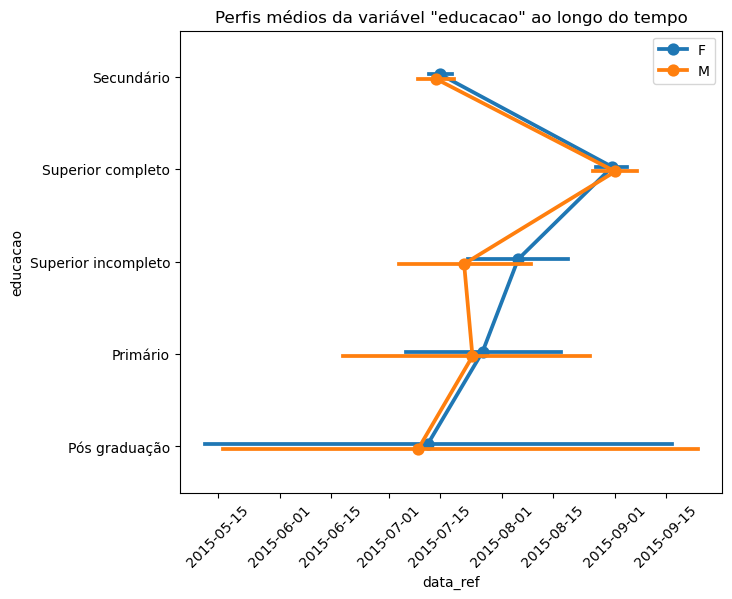

In [285]:
# Gráfico para a variável "educacao"

plt.figure(figsize=[7,6])

sns.pointplot(x='data_ref',y= 'educacao', hue='sexo', data=df_quali, dodge=True)
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.title('Perfis médios da variável "educacao" ao longo do tempo')

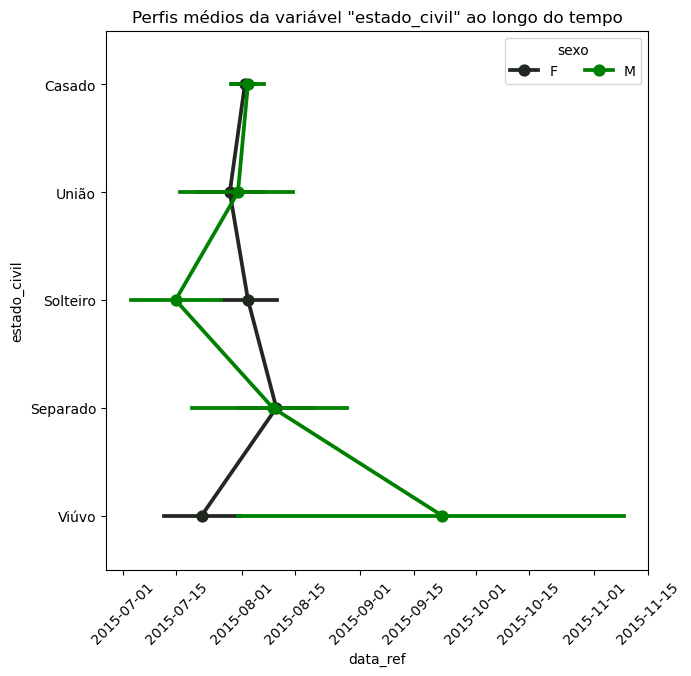

In [313]:
# Para a variável 'estado_civil'

fig = plt.figure(figsize=[7,7])
sns.pointplot(data=df_quali, x='data_ref', y='estado_civil', hue='sexo', palette='dark:green')
plt.xticks(rotation=45)
plt.title('Perfis médios da variável "estado_civil" ao longo do tempo')
plt.legend(loc='best', ncol=2, title='sexo')

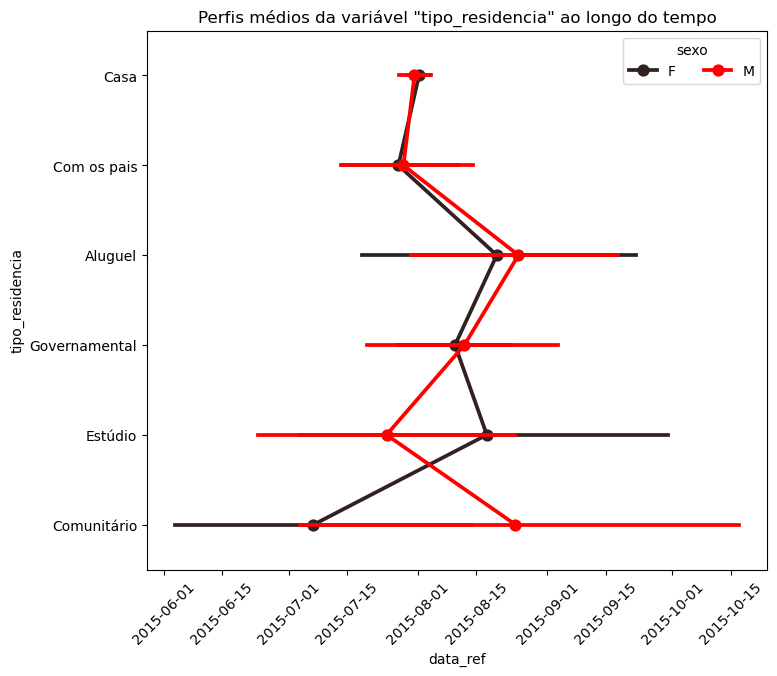

In [315]:
# Para a variável 'tipo_residencia'

fig = plt.figure(figsize=[8,7])
sns.pointplot(data=df_quali,
              x='data_ref',
              y='tipo_residencia', 
              hue='sexo', 
              palette='dark:red'
)
plt.xticks(rotation=45)
plt.title('Perfis médios da variável "tipo_residencia" ao longo do tempo')
plt.legend(loc='best', ncol=2, title='sexo')

## Insights

Com base nos gráficos dos perfis médios ao longo do tempo, nota-se que a variável "educação" pode indicar uma instabilidade ou que a população está mudando.